# Introduction

## Goal 1: Ingest and manipulate the data using Pandas dataframes.

### Loading Libraries

In [626]:
#importing Libraries
import numpy as np 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

### Reading and exploring the .csv file

In [627]:
#reading .csv file
df = pd.read_csv('API_19_DS2_en_csv_v2_3358246.csv', header=2)

#looking at the first 5 rows
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.78,50.76,50.75,50.73,50.72,50.70,...,42.96,42.99,43.04,43.11,43.19,43.29,43.41,43.55,43.70,NaN
1,Aruba,ABW,Urban population,SP.URB.TOTL,27525.00,28139.00,28537.00,28763.00,28922.00,29080.00,...,44059.00,44351.00,44666.00,44978.00,45293.00,45614.00,45949.00,46294.00,46654.00,NaN
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.21,1.40,0.79,0.55,0.54,...,0.54,0.66,0.71,0.70,0.70,0.71,0.73,0.75,0.77,NaN
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.00,55434.00,56234.00,56699.00,57029.00,57357.00,...,102565.00,103165.00,103776.00,104339.00,104865.00,105361.00,105846.00,106310.00,106766.00,NaN
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.24,1.43,0.82,0.58,0.57,...,0.50,0.58,0.59,0.54,0.50,0.47,0.46,0.44,0.43,NaN


### Reformatting dataframe for usability

In [628]:
#replacing spaces'' in column names with '_' for naming convention
df.columns = df.columns.str.replace(' ', '_')

#dropping code columns like Country_Code and Indicator_Code and Unnamed: 65
df.drop(df.columns[[1, 3, 65]], axis = 1, inplace = True)

#formating all float values to 2 decimal points
pd.options.display.float_format = '{:.2f}'.format

df.head() #Looking at the first 5 rows

,Country_Name,Indicator_Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,Urban population (% of total population),50.78,50.76,50.75,50.73,50.72,50.70,50.69,50.67,...,42.94,42.96,42.99,43.04,43.11,43.19,43.29,43.41,43.55,43.70
1,Aruba,Urban population,27525.00,28139.00,28537.00,28763.00,28922.00,29080.00,29246.00,29411.00,...,43820.00,44059.00,44351.00,44666.00,44978.00,45293.00,45614.00,45949.00,46294.00,46654.00
2,Aruba,Urban population growth (annual %),NaN,2.21,1.40,0.79,0.55,0.54,0.57,0.56,...,0.10,0.54,0.66,0.71,0.70,0.70,0.71,0.73,0.75,0.77
3,Aruba,"Population, total",54208.00,55434.00,56234.00,56699.00,57029.00,57357.00,57702.00,58044.00,...,102050.00,102565.00,103165.00,103776.00,104339.00,104865.00,105361.00,105846.00,106310.00,106766.00
4,Aruba,Population growth (annual %),NaN,2.24,1.43,0.82,0.58,0.57,0.60,0.59,...,0.38,0.50,0.58,0.59,0.54,0.50,0.47,0.46,0.44,0.43


In [629]:
#looking at the column names and data types
df.dtypes

Country_Name       object
Indicator_Name     object
1960              float64
1961              float64
1962              float64
                   ...   
2016              float64
2017              float64
2018              float64
2019              float64
2020              float64
Length: 63, dtype: object

In [630]:
#looking for unique rows under column "Indicator_Name"
df.sort_values("Indicator_Name", inplace = True)#sorting in ascending order
df["Indicator_Name"].unique()

array(['Access to electricity (% of population)',
       'Agricultural irrigated land (% of total agricultural land)',
       'Agricultural land (% of land area)', 'Agricultural land (sq. km)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Annual freshwater withdrawals, total (% of internal resources)',
       'Annual freshwater withdrawals, total (billion cubic meters)',
       'Arable land (% of land area)',
       'Average precipitation in depth (mm per year)',
       'CO2 emissions (kg per 2015 US$ of GDP)',
       'CO2 emissions (kg per 2017 PPP $ of GDP)',
       'CO2 emissions (kg per PPP $ of GDP)', 'CO2 emissions (kt)',
       'CO2 emissions (metric tons per capita)',
       'CO2 emissions from gaseous fuel consumption (% of total)',
       'CO2 emissions from gaseous fuel consumption (kt)',
       'CO2 emissions from liquid fuel consumption (% of total)',
       'CO2 emissions from liquid fuel consumption (kt)',
       'CO2 emissions from solid 

## Goal 2: Explore the statistical properties of a few indicators, that are of interest to you, and cross-compare between individual countries and the whole world (you don't have to do all the countries, just a few will do) and produce appropriate summary statistics.

### Defining dataframe to show indicator list filtered by the World

In [631]:
#indicators list of interest
indicator_list = ['CO2 emissions from gaseous fuel consumption (% of total)',
                  'CO2 emissions from liquid fuel consumption (% of total)',
                  'CO2 emissions from solid fuel consumption (% of total)']

In [632]:
#Filtering Country_Name by World and indicator list
df_world = df.loc[(df.Country_Name == 'World') & 
                  (df.Indicator_Name.isin(indicator_list))]

#dropping column Country_Name
df_world.drop(df_world.columns[[0]], axis = 1, inplace = True)

#transposing the dataframe
df_world = df_world.set_index('Indicator_Name').transpose(copy=True)#copy-True to retain datatypes after transpose

#resetting index
df_world.reset_index(inplace=True)

#renaming column label from index to Year
df_world = df_world.rename(columns={"index": "Year"}) 

#removing column name label
df_world.columns.name='' 

#dropping columns with all NaN values
df_world = df_world.dropna()
df_world = df_world.reset_index(drop=True)

#converting to Year column to dtype datetime
df_world['Year'] = pd.to_datetime(df_world['Year'], format='%Y')

C:\Users\nidhi\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [633]:
#looking at new dataframe
df_world

,Year,CO2 emissions from gaseous fuel consumption (% of total),CO2 emissions from liquid fuel consumption (% of total),CO2 emissions from solid fuel consumption (% of total)
0,1960-01-01,10.11,33.84,53.23
1,1961-01-01,10.73,35.78,50.61
2,1962-01-01,11.41,37.18,48.49
3,1963-01-01,11.71,37.60,47.76
4,1964-01-01,12.23,38.21,46.37
5,1965-01-01,12.39,38.99,45.33
6,1966-01-01,12.83,39.80,43.96
7,1967-01-01,13.25,40.99,41.95
8,1968-01-01,13.64,42.30,40.18
9,1969-01-01,13.97,42.95,39.01


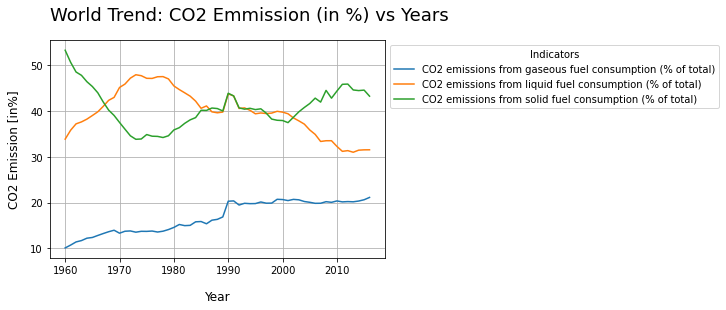

In [634]:
#melting Dataframe for Seaborn plot
df_world_m = df_world.melt("Year",var_name="", value_name="vals") 

#using seaborn lineplot    
sns.lineplot(data=df_world_m, x="Year", y="vals" , hue="")

plt.title('World Trend: CO2 Emmission (in %) vs Years', fontsize=18, pad=20, loc='left')

plt.xlabel('Year', fontsize=12, labelpad=15)
plt.xticks(fontsize=10)

plt.ylabel('CO2 Emission [in%]', fontsize=12, labelpad=10)
plt.yticks(fontsize=10)

plt.legend(title='Indicators', bbox_to_anchor=(1, 1))

plt.grid()#showing gridlines

### Stastical Analysis of CO2 Emissions in the World

In [635]:
#statistical anlaysis of CO2 emissions in the World
df_world.describe()

,CO2 emissions from gaseous fuel consumption (% of total),CO2 emissions from liquid fuel consumption (% of total),CO2 emissions from solid fuel consumption (% of total)
count,57.00,57.00,57.00
mean,16.87,39.78,40.68
std,3.42,4.98,4.34
min,10.11,30.98,33.81
25%,13.75,37.12,37.90
50%,16.34,39.75,40.38
75%,20.17,43.27,43.86
max,21.12,47.89,53.23


### Listing top-5 most influential countries and the World for further comparison with some indicators

In [637]:
#country list of interest
country_list = ['China', 
                'Germany',
                'Russian Federation',
                'United Kingdom',
                'United States',
                'World']

### Comparing for Indicator: Total greenhouse gas emissions (% change from 1990)

In [638]:
#Filtering Country_Name by World and indicator list
df_greenhouse = df.loc[(df.Country_Name.isin(country_list)) & 
                      (df.Indicator_Name == 'Total greenhouse gas emissions (% change from 1990)')]

#dropping column Indicator_Name
df_greenhouse.drop(df_greenhouse.columns[[1]], axis = 1, inplace = True)

#transposing the dataframe
df_greenhouse = df_greenhouse.set_index('Country_Name').transpose(copy=True)#copy-True to retain datatypes after transpose

#resetting index
df_greenhouse.reset_index(inplace=True)

#renaming column label from index to Year
df_greenhouse = df_greenhouse.rename(columns={"index": "Year"}) 

#removing column name label
df_greenhouse.columns.name='' 

#dropping columns with all NaN values
df_greenhouse = df_greenhouse.dropna()
df_greenhouse = df_greenhouse.reset_index(drop=True)

#converting to Year column to dtype datetime
df_greenhouse['Year'] = pd.to_datetime(df_greenhouse['Year'], format='%Y')

C:\Users\nidhi\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [639]:
#looking at new dataframe
df_greenhouse

,Year,Germany,United Kingdom,Russian Federation,United States,China,World
0,1991-01-01,-2.95,0.69,-5.61,-1.02,3.66,0.93
1,1992-01-01,-7.74,-2.09,-12.96,0.02,7.19,4.16
2,1993-01-01,-8.63,-5.62,-16.13,2.39,12.99,-0.39
3,1994-01-01,-9.56,-6.25,-24.66,3.89,18.52,1.51
4,1995-01-01,-9.90,-6.29,-26.39,3.74,29.53,2.11
5,1996-01-01,-8.20,-4.23,-24.35,7.20,33.12,2.68
6,1997-01-01,-10.60,-7.86,-31.61,9.59,31.37,13.45
7,1998-01-01,-15.58,-9.27,-3.73,9.99,32.08,15.21
8,1999-01-01,-18.76,-12.50,-30.08,10.95,30.48,6.96
9,2000-01-01,-19.09,-13.30,-22.88,13.58,30.56,6.10


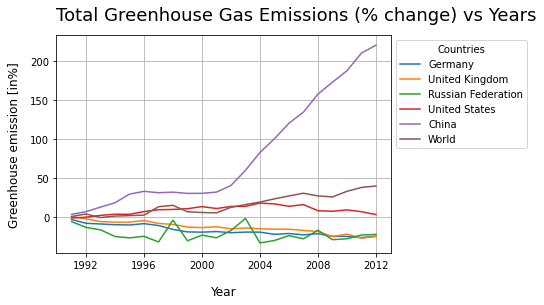

In [640]:
#melting dataframe for Seaborn plot
df_greenhouse_m = df_greenhouse.melt("Year",var_name="",value_name="vals") 

#using seaborn lineplot    
sns.lineplot(data=df_greenhouse_m, x="Year", y="vals" , hue="")

plt.title('Total Greenhouse Gas Emissions (% change) vs Years', fontsize=18, pad=15, loc='left')

plt.xlabel('Year', fontsize=12, labelpad=15)
plt.xticks(fontsize=10)

plt.ylabel('Greenhouse emission [in%]', fontsize=12, labelpad=10)
plt.yticks(fontsize=10)

plt.legend(title='Countries', bbox_to_anchor=(1, 1))

plt.grid()#showing gridlines

### Comparing for Indicator: Agricultural land (% of land area)

In [641]:
#filtering Country_Name by World and indicator list
df_agriland = df.loc[(df.Country_Name.isin(country_list)) & 
                      (df.Indicator_Name == 'Agricultural land (% of land area)')]

#dropping column Indicator_Name
df_agriland.drop(df_agriland.columns[[1]], axis = 1, inplace = True)

#transposing the dataframe
df_agriland = df_agriland.set_index('Country_Name').transpose(copy=True)#copy-True to retain datatypes after transpose

#resetting index
df_agriland.reset_index(inplace=True)

#renaming column label from index to Year
df_agriland = df_agriland.rename(columns={"index": "Year"}) 

#removing column name label
df_agriland.columns.name='' 

#dropping columns with all NaN values
df_agriland = df_agriland.dropna()
df_agriland = df_agriland.reset_index(drop=True)

#converting to Year column to dtype datetime
df_agriland['Year'] = pd.to_datetime(df_agriland['Year'], format='%Y')

C:\Users\nidhi\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [642]:
#looking at new dataframe
df_agriland

,Year,Germany,China,United Kingdom,Russian Federation,World,United States
0,1992-01-01,48.55,54.66,74.69,13.52,36.89,46.45
1,1993-01-01,49.16,55.08,72.48,13.35,36.76,46.18
2,1994-01-01,49.58,55.57,71.96,13.29,36.92,45.98
3,1995-01-01,49.68,55.57,71.83,13.21,36.91,45.87
4,1996-01-01,49.66,55.57,72.31,13.20,36.96,45.45
5,1997-01-01,49.64,55.57,72.69,13.31,37.10,45.30
6,1998-01-01,49.78,55.57,72.41,13.26,37.21,45.27
7,1999-01-01,49.15,55.57,71.17,13.23,37.23,45.19
8,2000-01-01,48.91,55.57,70.12,13.26,37.25,45.23
9,2001-01-01,48.82,55.63,70.07,13.24,37.26,45.29


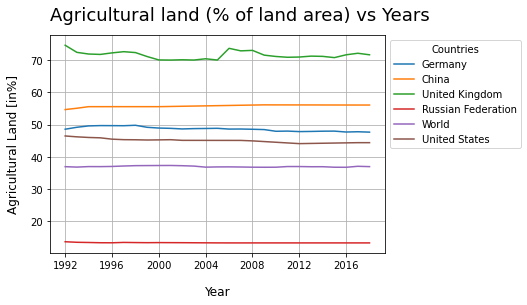

In [643]:
#melting dataframe for Seaborn plot
df_agriland_m = df_agriland.melt("Year",var_name="",value_name="vals") 

#using seaborn lineplot    
sns.lineplot(data=df_agriland_m, x="Year", y="vals" , hue="")

plt.title('Agricultural land (% of land area) vs Years', fontsize=18, pad=15, loc='left')

plt.xlabel('Year', fontsize=12, labelpad=15)
plt.xticks(fontsize=10)

plt.ylabel('Agricultural Land [in%]', fontsize=12, labelpad=10)
plt.yticks(fontsize=10)

plt.legend(title='Countries', bbox_to_anchor=(1, 1))

plt.grid()#showing gridlines

### Comparing for Indicator: Electricity production from coal sources (% of total)

In [644]:
#filtering Country_Name by World and indicator list
df_coalsource = df.loc[(df.Country_Name.isin(country_list)) & 
                      (df.Indicator_Name == 'Electricity production from coal sources (% of total)')]

#dropping column Indicator_Name
df_coalsource.drop(df_coalsource.columns[[1]], axis = 1, inplace = True)

#transposing the dataframe
df_coalsource = df_coalsource.set_index('Country_Name').transpose(copy=True)#copy-True to retain datatypes after transpose

#resetting index
df_coalsource.reset_index(inplace=True)

#renaming column label from index to Year
df_coalsource = df_coalsource.rename(columns={"index": "Year"}) 

#removing column name label
df_coalsource.columns.name='' 

#dropping columns with all NaN values
df_coalsource = df_coalsource.dropna()
df_coalsource = df_coalsource.reset_index(drop=True)

#converting to Year column to dtype datetime
df_coalsource['Year'] = pd.to_datetime(df_coalsource['Year'], format='%Y')

C:\Users\nidhi\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [645]:
#looking at new dataframe
df_coalsource

,Year,China,World,Germany,United States,Russian Federation,United Kingdom
0,1990-01-01,71.04,37.01,58.73,53.07,14.33,64.97
1,1991-01-01,73.51,37.07,59.15,52.60,14.32,65.80
2,1992-01-01,75.03,37.41,57.12,53.24,14.98,60.64
3,1993-01-01,73.50,37.38,57.38,53.40,15.43,53.24
4,1994-01-01,74.79,37.53,56.53,52.52,18.39,49.64
5,1995-01-01,73.75,37.35,55.62,51.50,18.51,46.68
6,1996-01-01,76.20,37.96,54.96,52.72,18.83,42.16
7,1997-01-01,76.36,38.02,53.36,53.81,18.70,34.93
8,1998-01-01,75.64,37.82,54.12,52.74,19.50,34.65
9,1999-01-01,77.67,37.65,52.15,52.12,18.94,29.66


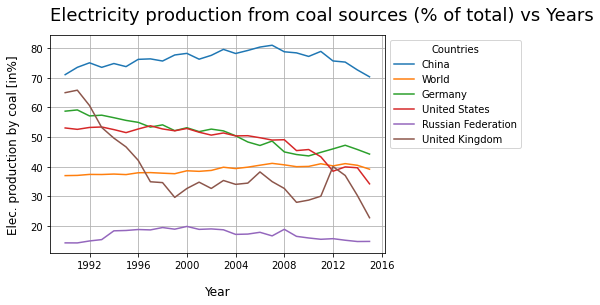

In [646]:
#melting dataframe for Seaborn plot
df_coalsource_m = df_coalsource.melt("Year",var_name="",value_name="vals") 

#using seaborn lineplot    
sns.lineplot(data=df_coalsource_m, x="Year", y="vals" , hue="")

plt.title('Electricity production from coal sources (% of total) vs Years', fontsize=18, pad=15, loc='left')

plt.xlabel('Year', fontsize=12, labelpad=15)
plt.xticks(fontsize=10)

plt.ylabel('Elec. production by coal [in%]', fontsize=12, labelpad=10)
plt.yticks(fontsize=10)

plt.legend(title='Countries', bbox_to_anchor=(1, 1))

plt.grid()#showing gridlines

### Goal 3: Explore and understand any correlations (or lack of) between indicators (e.g. population growth and energy consumption). Does this vary between country, have any correlations or trends changed with time?

In [647]:
#columns of interest for correlation check
correlation_list = ['Arable land (% of land area)', 
                'Agricultural land (% of land area)',
                'Forest area (% of land area)',
                'Population growth (annual %)']

### Comparing indicators for correlation in China

In [648]:
#filtering Country_Name by China and correlation list
df_china = df.loc[(df.Country_Name == 'China') & 
                  (df.Indicator_Name.isin(correlation_list))]

#dropping column Country_Name 
df_china.drop(df_china.columns[[0]], axis = 1, inplace = True)

#transposing the dataframe
df_china = df_china.set_index('Indicator_Name').transpose(copy=True)#copy-True to retain datatypes after transpose

#resetting index
df_china.reset_index(inplace=True)

#dropping column name index
df_china.drop(df_china.columns[[0]], axis = 1, inplace = True)

#removing column name label
df_china.columns.name='' 

#dropping columns with all NaN values
df_china = df_china.dropna()
df_china = df_china.reset_index(drop=True)

C:\Users\nidhi\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [649]:
#looking at new dataframe
df_china

,Agricultural land (% of land area),Arable land (% of land area),Forest area (% of land area),Population growth (annual %)
0,53.75,13.21,16.67,1.47
1,54.35,13.32,16.88,1.36
2,54.66,13.11,17.09,1.23
3,55.08,12.94,17.31,1.15
4,55.57,12.88,17.52,1.13
5,55.57,12.76,17.73,1.09
6,55.57,12.73,17.94,1.05
7,55.57,12.70,18.15,1.02
8,55.57,12.70,18.36,0.96
9,55.57,12.70,18.57,0.87


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'Agricultural land (% of land area)'),
  Text(1.5, 0, 'Arable land (% of land area)'),
  Text(2.5, 0, 'Forest area (% of land area)'),
  Text(3.5, 0, 'Population growth (annual %)')])

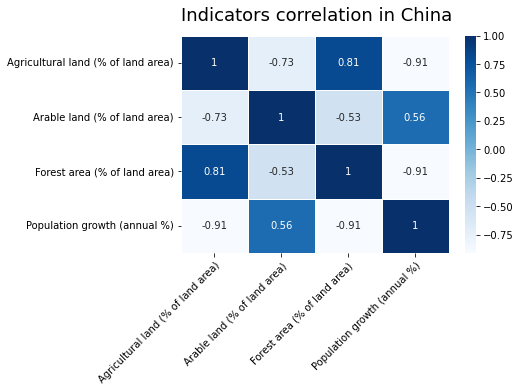

In [650]:
#using seaborn heatmap
sns.heatmap(df_china.corr(), cmap="Blues", linewidths=.5, annot=True)

plt.title('Indicators correlation in China', fontsize=18, pad=15, loc='left')
plt.xticks(rotation=45, rotation_mode='anchor', ha='right')

### Comparing indicators for correlation in India

In [651]:
#filtering Country_Name by India and correlation list
df_india = df.loc[(df.Country_Name == 'India') & 
                  (df.Indicator_Name.isin(correlation_list))]

#dropping column Country_Name 
df_india.drop(df_india.columns[[0]], axis = 1, inplace = True)

#transposing the dataframe
df_india = df_india.set_index('Indicator_Name').transpose(copy=True)#copy-True to retain datatypes after transpose

#resetting index
df_india.reset_index(inplace=True)

#dropping column name index
df_india.drop(df_india.columns[[0]], axis = 1, inplace = True)

#removing column name label
df_india.columns.name='' 

#dropping columns with all NaN values
df_india = df_india.dropna()
df_india = df_india.reset_index(drop=True)

C:\Users\nidhi\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [652]:
#looking at new dataframe
df_india

,Agricultural land (% of land area),Arable land (% of land area),Forest area (% of land area),Population growth (annual %)
0,61.02,54.98,21.50,2.08
1,61.07,54.88,21.63,2.04
2,60.98,54.72,21.75,2.00
3,61.01,54.68,21.87,1.97
4,60.98,54.66,22.00,1.94
5,60.86,54.46,22.12,1.92
6,60.74,54.16,22.24,1.90
7,60.87,54.35,22.36,1.87
8,60.83,54.29,22.49,1.84
9,60.88,54.14,22.61,1.81


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'Agricultural land (% of land area)'),
  Text(1.5, 0, 'Arable land (% of land area)'),
  Text(2.5, 0, 'Forest area (% of land area)'),
  Text(3.5, 0, 'Population growth (annual %)')])

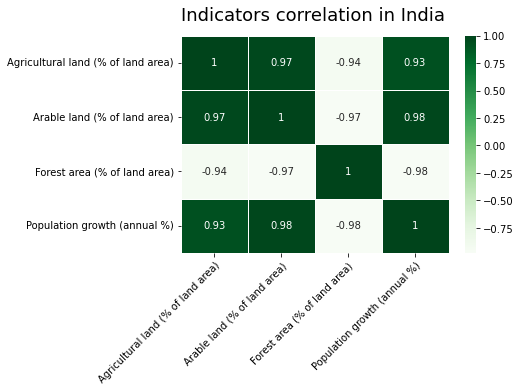

In [653]:
#using seaborn heatmap
sns.heatmap(df_india.corr(), cmap="Greens", linewidths=.5, annot=True)

plt.title('Indicators correlation in India ', fontsize=18, pad=15, loc='left')
plt.xticks(rotation=45, rotation_mode='anchor', ha='right')